In [1]:
from qiskit import *

In [2]:
def qubit_initialization(qcircuit, q_index):
    import numpy as np
    qcircuit.initialize([np.sqrt(0.7), np.sqrt(0.3)],q_index)
    return qcircuit

In [3]:
def entanglement_AB(qcircuit,Alicja,Bob):
    qcircuit.h(Alicja)
    qcircuit.cx(Alicja,Bob)
    return qcircuit

In [4]:
def Bella_measurement(qcircuit, State_for_teleportation, Alicja, Reg_measurement1):
    qcircuit.cx(State_for_teleportation,Alicja)
    qcircuit.h(State_for_teleportation)
    qcircuit.barrier()
    qcircuit.measure(State_for_teleportation,Reg_measurement1)
    qcircuit.measure(Alicja,Reg_measurement1)
    return qcircuit              

In [5]:
def Alice_qubit_control(qcircuit, State_for_teleportation, Alicja, Qubit_Bob):
    qcircuit.cz(State_for_teleportation, Qubit_Boba)
    qcircuit.cx(Alicja, Qubit_Boba)
    return qcircuit

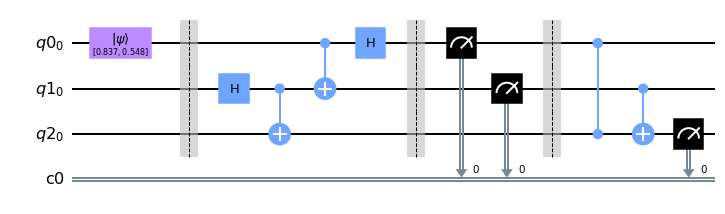

In [6]:
State_for_teleportation = QuantumRegister(1)
Qubit_Alicji = QuantumRegister(1)
Qubit_Boba = QuantumRegister(1)
Reg_measurement1 = ClassicalRegister(1)

qc = QuantumCircuit(State_for_teleportation, Qubit_Alicji, Qubit_Boba, Reg_measurement1)
qubit_initialization(qc,State_for_teleportation)
qc.barrier()
entanglement_AB(qc,Qubit_Alicji,Qubit_Boba)
Bella_measurement(qc,State_for_teleportation,Qubit_Alicji,Reg_measurement1)
qc.barrier()
Alice_qubit_control(qc,State_for_teleportation, Qubit_Alicji, Qubit_Boba)
qc.measure(Qubit_Boba,Reg_measurement1)
qc.draw(output='mpl')

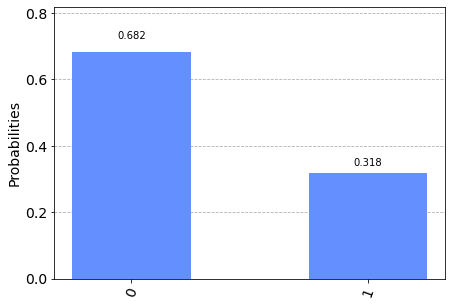

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)